In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cm_number = 30
cm = plt.cm.get_cmap("tab10")
colors = [cm(1. / (cm_number - 1) * i) for i in range(0, cm_number)]
data = pd.read_csv("data.csv")
start = 0
t = np.array(data["Time"][start:])
t = t - t[0]
NADH = np.array(data['NADH'][start:])
ATP = np.array(data['ATP'][start:])
data.head()

C:\Users\TengMa\AppData\Local\Temp\ipykernel_26876\1600000971.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("tab10")


,Time,NADH,ATP
0,501.77,1.081373,2.056894
1,501.78,1.081350,2.056901
2,501.79,1.081325,2.056909
3,501.80,1.081301,2.056916
4,501.81,1.081275,2.056924


In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Markdown
# mpl.rc('text', usetex=True)
mpl.rc('font', family='Arial')
mpl.rc('font',size = 6)
mpl.rc('mathtext',fontset = 'stix')
mpl.rc('xtick', labelsize=4)
mpl.rc('ytick', labelsize=4)
mpl.rc('axes', labelsize=8)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.2)
mpl.rc('figure', figsize=(3.55/2.54, 7.5/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)

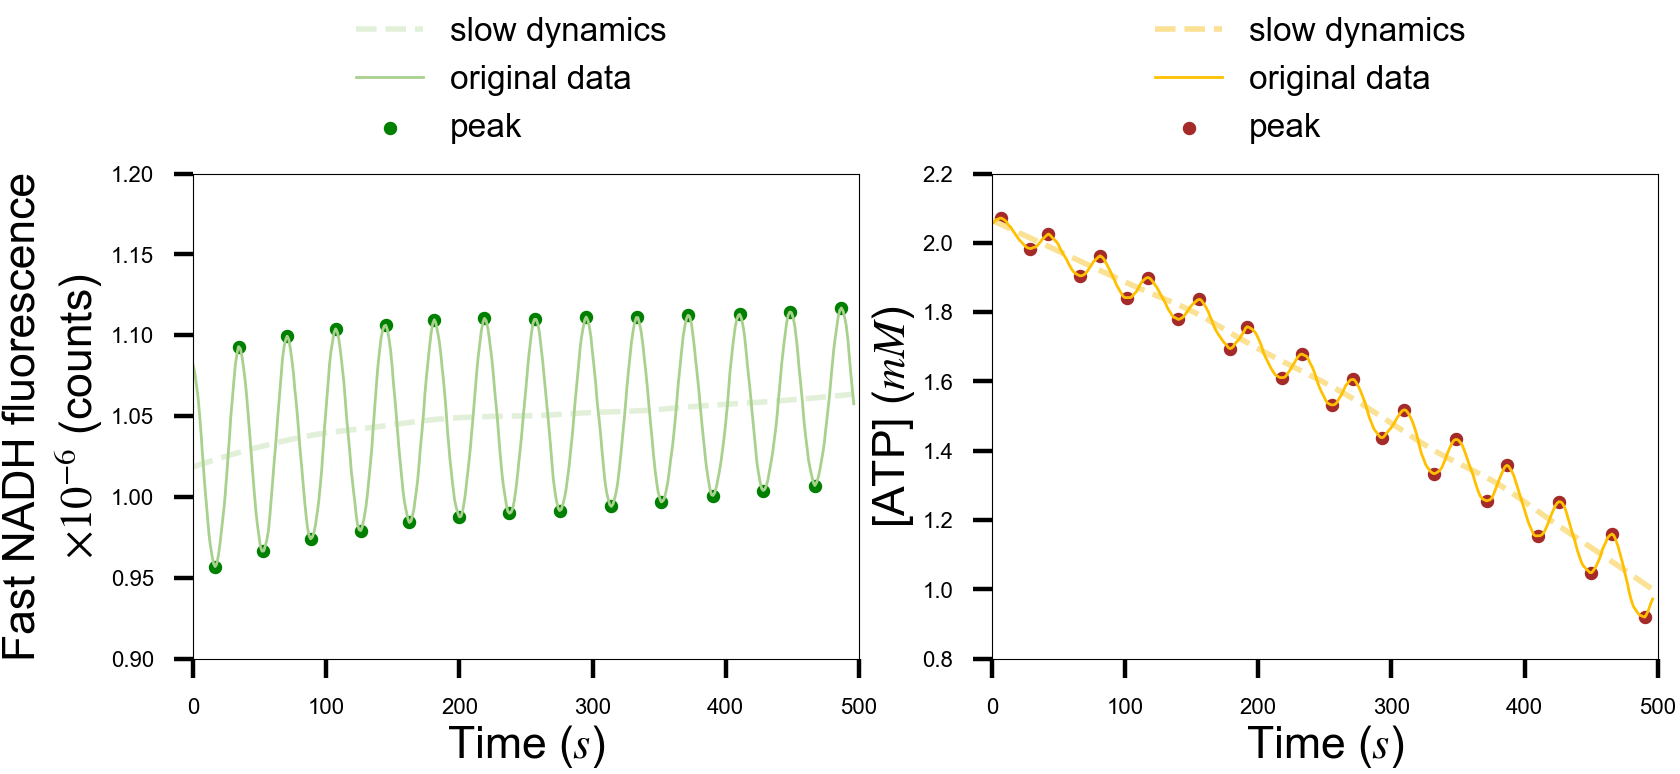

In [33]:
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.interpolate import KroghInterpolator
index_plus_NADH = find_peaks(NADH)[0]
index_minus_NADH = find_peaks(-NADH)[0]
interpolant_plus_NADH = interp1d(t[index_plus_NADH], NADH[index_plus_NADH], kind = "quadratic", fill_value='extrapolate')
interpolant_minus_NADH = interp1d(t[index_minus_NADH], NADH[index_minus_NADH],  kind = "quadratic", fill_value='extrapolate')
NADH_SLOW = (interpolant_plus_NADH(t) + interpolant_minus_NADH(t))/2
index_plus_ATP = find_peaks(ATP)[0]
index_minus_ATP = find_peaks(-ATP)[0]
interpolant_plus_ATP = interp1d(t[index_plus_ATP], ATP[index_plus_ATP], kind = "quadratic", fill_value='extrapolate')
interpolant_minus_ATP = interp1d(t[index_minus_ATP], ATP[index_minus_ATP], kind = "quadratic", fill_value='extrapolate')
ATP_SLOW = (interpolant_plus_ATP(t) + interpolant_minus_ATP(t))/2
fig,ax = plt.subplots(1,2,figsize = (12/2.54,4/2.54))
plt.subplots_adjust(wspace = 0.2)
ax[0].plot(t, NADH_SLOW,lw = 1,color = "#E2F0D9",ls = '--', label = "slow dynamics")
ax[0].plot(t,NADH,lw = 0.5,color = "#A9D18E",label = "original data")
ax[0].scatter(t[index_plus_NADH], NADH[index_plus_NADH],color = "green",s=2,label = "peak")
ax[0].scatter(t[index_minus_NADH], NADH[index_minus_NADH],color = "green",s=2)
ax[0].set_xlabel('Time ($s$)')
ax[0].set_ylabel('Fast NADH fluorescence\n'+r'$\times 10^{-6}$ (counts)')
ax[0].set_xlim(0,500)
ax[0].set_ylim(0.9,1.2)
ax[0].legend(bbox_to_anchor = (0.2,1))
ax[1].plot(t, ATP_SLOW,lw = 1,color = "#FAE194",ls = '--', label = "slow dynamics")
ax[1].plot(t,ATP,lw = 0.5,color = "#FFC000",label = "original data")
ax[1].scatter(t[index_plus_ATP], ATP[index_plus_ATP],color = "brown",s=2,label = "peak")
ax[1].scatter(t[index_minus_ATP], ATP[index_minus_ATP],color = "brown",s=2)
ax[1].set_xlabel('Time ($s$)')
ax[1].set_ylabel('[ATP] ($mM$)')
ax[1].set_xlim(0,500)
ax[1].set_ylim(0.8,2.2)
ax[1].legend(bbox_to_anchor = (0.2,1))
plt.savefig('./Fig/preprocess_1.svg',dpi = 600,transparent = True,bbox_inches="tight")

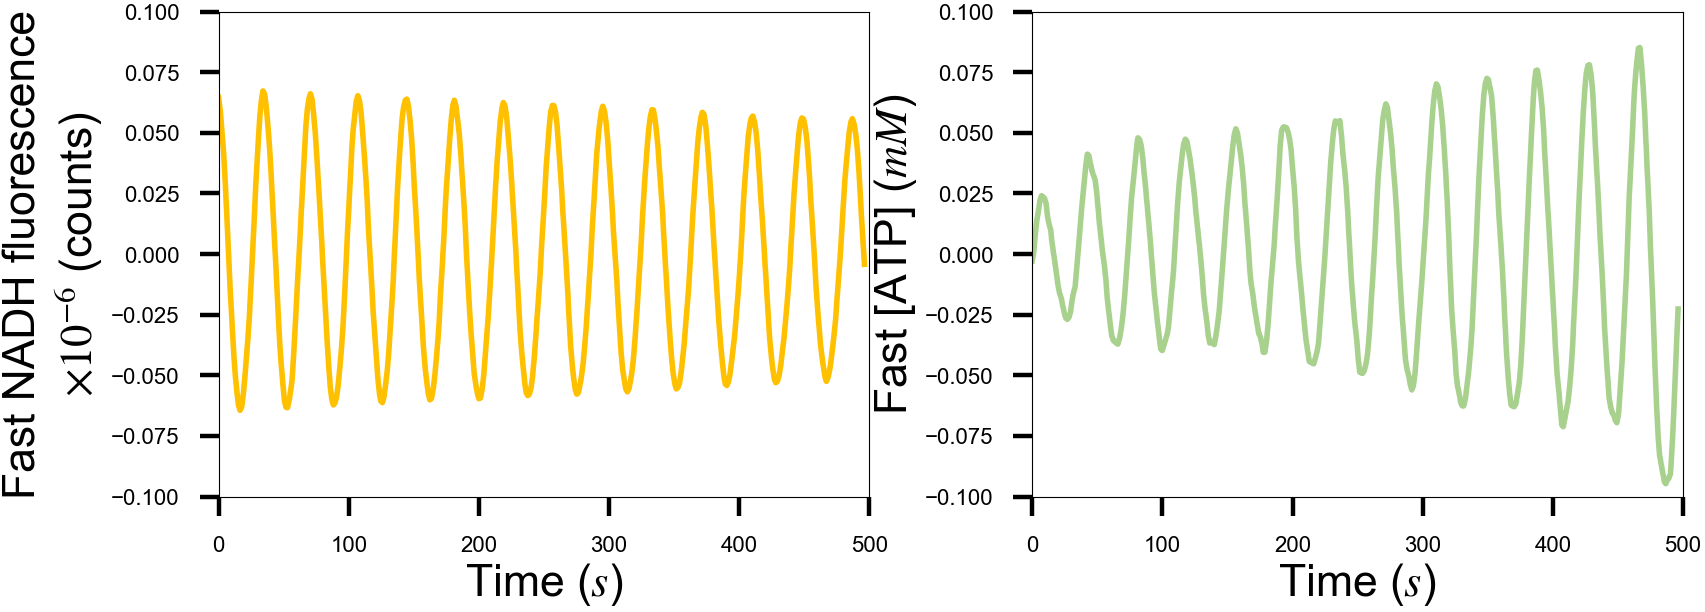

In [34]:
NADH_FAST = NADH - NADH_SLOW
ATP_FAST = ATP - ATP_SLOW
NADH_FAST = NADH_FAST - np.mean(NADH_FAST)
ATP_FAST = ATP_FAST - np.mean(ATP_FAST)
from scipy import signal
fig,ax = plt.subplots(1,2,figsize = (12/2.54,4/2.54))
plt.subplots_adjust(wspace = 0.25)

ax[0].plot(t, NADH_FAST,lw = 1,color = "#FFC000")
ax[0].set_xlabel('Time ($s$)')
ax[0].set_ylabel('Fast NADH fluorescence\n'+r'$\times 10^{-6}$ (counts)')
ax[0].set_xlim(0,500)
ax[0].set_ylim(-0.1,0.1)
ax[1].plot(t, ATP_FAST,lw = 1,color = "#A9D18E")
ax[1].set_xlabel('Time ($s$)')
ax[1].set_ylabel('Fast [ATP] ($mM$)')
ax[1].set_xlim(0,500)
ax[1].set_ylim(-0.1,0.1)
plt.savefig('./Fig/preprocess_2.svg',dpi = 600,transparent = True,bbox_inches="tight")
# b, a = signal.butter(4, 0.0008, 'lowpass')   #配置滤波器 8 表示滤波器的阶数
# NADH_FAST = signal.filtfilt(b, a, NADH_FAST)  #data为要过滤的信号
# ATP_FAST = signal.filtfilt(b, a, ATP_FAST)  #data为要过滤的信号
# ax[0].plot(t, NADH_FAST,lw = 1, ls = '--')
# ax[1].plot(t, ATP_FAST,lw = 1, ls = '--')

In [35]:
import sys
sys.path.append("../Model")
import Model
from itertools import combinations



library = [
    lambda x:x[0],
    lambda x:x[0]*x[0],
    lambda x:x[0]*x[0]*x[0],
    lambda x:x[1],
    lambda x:x[1]*x[1],
    lambda x:x[1]*x[1]*x[1],
    lambda x:x[2],
    lambda x:x[2]*x[2],
    lambda x:x[2]*x[2]*x[2],
    lambda x:x[3],
    lambda x:x[3]*x[3],
    lambda x:x[3]*x[3]*x[3],
    lambda x:x[0]*x[1],
    lambda x:x[0]*x[2],
    lambda x:x[0]*x[3],
    lambda x:x[1]*x[2],
    lambda x:x[1]*x[3],
    lambda x:x[2]*x[3]    

]
library_name = [
    lambda x,y:x,
    lambda x,y:x+x,
    lambda x,y:x+x+x,
    lambda x,y:y,
    lambda x,y:y+y,
    lambda x,y:y+y+y,
    lambda x,y:x+y,
    lambda x,y:x+x+y,
    lambda x,y:x+y+y
]
dim = 2
model = Model.WeakNO(dim,library,library_name)

In [36]:
Scale = 10
X = np.array([NADH_FAST/np.max(NADH_FAST)*Scale,ATP_FAST/np.max(ATP_FAST)*Scale]).T
model.Get_frequency(X,t)
for i in range(model.dims):
    print("X_%d,Identifed result: %.4f"%(i,model.frequencys[i]))
model.Get_Evolution(smooth_window = 1)

X_0,Identifed result: 0.1630
X_1,Identifed result: 0.1630


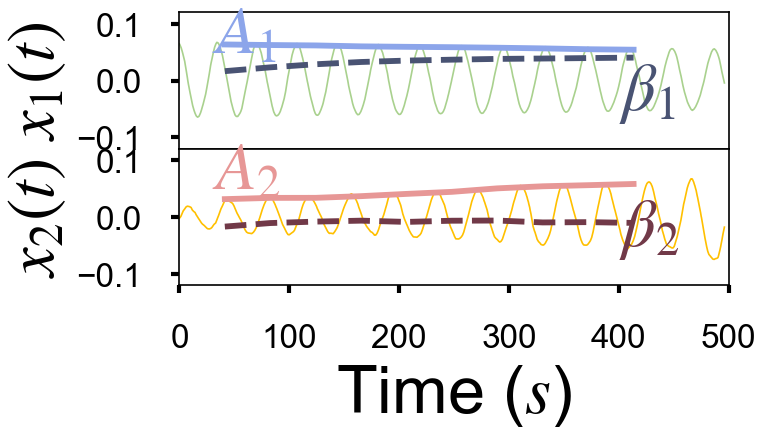

In [37]:
Colors = [
    ["#A9D18E","#8CA5EA","#495373"],
    ["#FFC000","#E79796","#713948"],
    
    ["#FFC000","#FCB462","#795B34"]
    
]
fig,axes = plt.subplots(2,1, figsize = (3/2.54,1.5/2.54),dpi = 600)
plt.subplots_adjust(hspace = 0)
for i in range(model.dims):
    ax = axes[i]

    ax.plot(t, X[:,i]*np.max(NADH_FAST)/Scale,lw = 0.2,color = Colors[i][0])
    ax.plot(model.t_evolutions[:],model.evolutions[0,i,:]*np.max(NADH_FAST)/Scale, color = Colors[i][1],lw = 0.7)
    ax.text(30,0.05,"$A_%d$"%(i+1), color = Colors[i][1],fontsize = 8)
    ax.text(400,-0.05,r"$\beta_%d$"%(i+1), color = Colors[i][2],fontsize = 8)
    ax.set_ylabel(r"$x_%d(t)$"%(i+1))
    ax.set_ylim(-0.12,0.12)
    ax.set_xlim(0,500)
    if i == 0:
        ax.set_xticks([])
    else:
        ax.set_xlabel("Time ($s$)")
    # ax2 = ax.twinx()
    # ax2.set_ylim(-0.07,0.07)
    ax.tick_params(direction='out',width = 0.5,length = 1)
    # ax2.tick_params(direction='out',width = 0.5,length = 1)
    ax.plot(model.t_evolutions[:],np.radians(model.evolutions[1,i,:]), lw = .7,ls = '--',color = Colors[i][2])
plt.savefig("Fig/Data.svg",dpi = 600,transparent = True,bbox_inches="tight")
plt.show()


In [38]:
model.Library_rebuild()

C:\Users\TengMa\AppData\Local\Temp\ipykernel_26876\3920887845.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm2 = plt.cm.get_cmap("Blues")
C:\Users\TengMa\AppData\Local\Temp\ipykernel_26876\3920887845.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm1 = plt.cm.get_cmap("Purples")
C:\Users\TengMa\AppData\Local\Temp\ipykernel_26876\3920887845.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm3 = plt.cm.get_cmap("Oranges")


(10, 2, 18, 2)


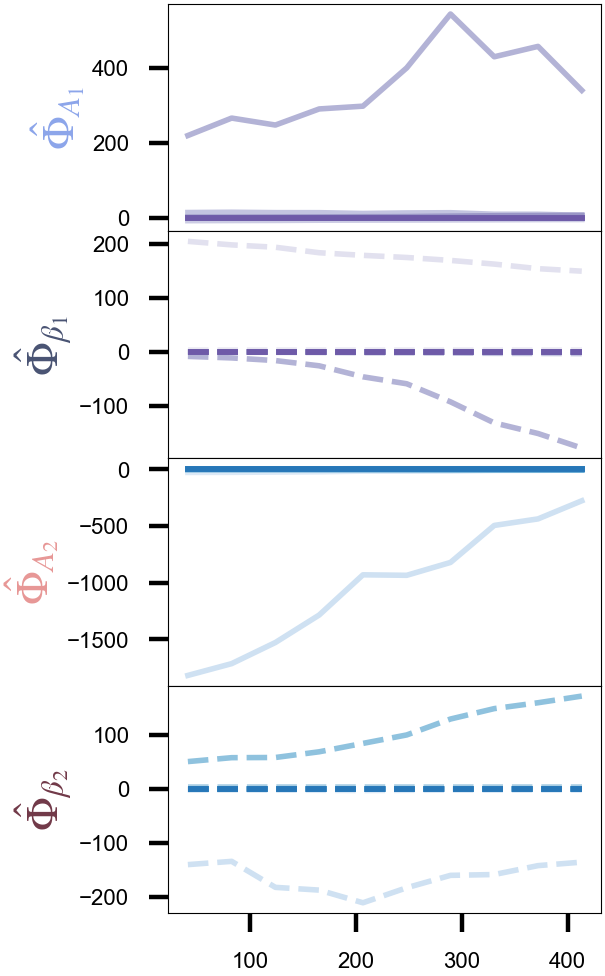

In [39]:
cm_number = 30
cm2 = plt.cm.get_cmap("Blues")
cm1 = plt.cm.get_cmap("Purples")
cm3 = plt.cm.get_cmap("Oranges")
C = [[cm1(1. / (cm_number - 1) * i) for i in range(0, cm_number)],[cm2(1. / (cm_number - 1) * i) for i in range(0, cm_number)],[cm3(1. / (cm_number - 1) * i) for i in range(0, cm_number)]]
fig,axes = plt.subplots(model.dims*2,1)
plt.subplots_adjust(hspace = 0)
Titles = [r"A",r"\beta"]
lss = ['-','--']
print(np.shape(model.Phi))
for d in range(model.dims):
    for i in range(2):
        ax = axes[2*d+i]
        for j in range(len(model.library)):
            # if np.max(np.abs(model.Phi[:,i,j,d]))>1e-2:
                # c += 1
                # print(i,j,d)
                ax.plot(model.t_evolutions[:], model.Phi[:,i,j,d], color = C[d][j+4], ls = lss[i], lw = 1)
        ax.set_ylabel(r"$\hat{\Phi}_{%s_%d}$"%(Titles[i],d+1),color = Colors[d][i+1])

In [40]:
model.optimize(sparse_threshold = 3e-1,
                           stop_tolerance = 1e-1,
                           step_tolerance=  1e-2,
                           w_A2b=10,
                           smooth_window=1,
              dot_edge = 1)
print(model.Xi)

[[ 0.00000000e+00  0.00000000e+00  4.07419327e-05  0.00000000e+00
   0.00000000e+00  2.75480907e-03  1.29688805e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.54876280e-06  1.09948455e-02
   0.00000000e+00 -6.38410215e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


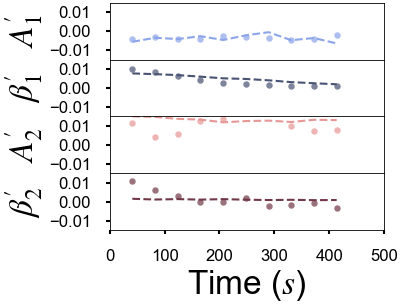

In [41]:
dt = model.t_evolutions[1] - model.t_evolutions[0]
fig,axes = plt.subplots(model.dims*2,figsize = (3/2.54,2.5/2.54),dpi = 300)
plt.subplots_adjust(hspace = 0)
plt.subplots_adjust(hspace = 0)
for d in range(model.dims):
    for i in range(2):
        ax = axes[2*d+i]
        ax.tick_params(direction='out',width = 0.5,length = 1)
    # ax2.tick_params(direction='out',width = 0.5,length = 1)
        ax.scatter(model.t_evolutions[:],np.gradient(model.evolutions[i,d,:],dt,edge_order=2), s=0.3,alpha = 0.7,color = Colors[d][1+i],ls = "-",label = r"True $dA/dT$")
        ax.plot(model.t_evolutions[:],np.dot(model.Phi[:,i,:,d],model.Xi[d]),  lw = 0.5,alpha = 1,color = Colors[d][1+i],ls = "--",label = r"Fitting $dA/dT$")
        ax.set_ylim(-0.015,0.015)
        # ax.set_xlim(0,t[-1])
        # ax.set_ylim(-12,12)
        ax.set_ylabel(r"$%s_%d'$"%(Titles[i],d+1))
        # ax.set_yticks([])
        ax.set_xlim(0,500)
        if d<1 or i == 0:
            ax.set_xticks([])
        else:
            ax.set_xlabel('Time ($s$)')
plt.savefig("Fig/EvolutionODE.svg",dpi = 600,transparent = True,bbox_inches="tight")

In [42]:
dt = 0.01
ATP_dot = np.gradient(ATP_FAST/np.max(ATP_FAST)*Scale,dt,edge_order=2)
NADH_dot = np.gradient(NADH_FAST/np.max(NADH_FAST)*Scale,dt,edge_order = 2)
start = 1500
x0 = [NADH_FAST[start]/np.max(NADH_FAST)*Scale, NADH_dot[start], ATP_FAST[start]/np.max(ATP_FAST)*Scale, ATP_dot[start]]
# x0 = [NADH_FAST[0], NADH_dot[0]]
print(x0)

[-9.084479280127011, -0.6648162163267024, 0.6648240686809919, -0.601025695000651]


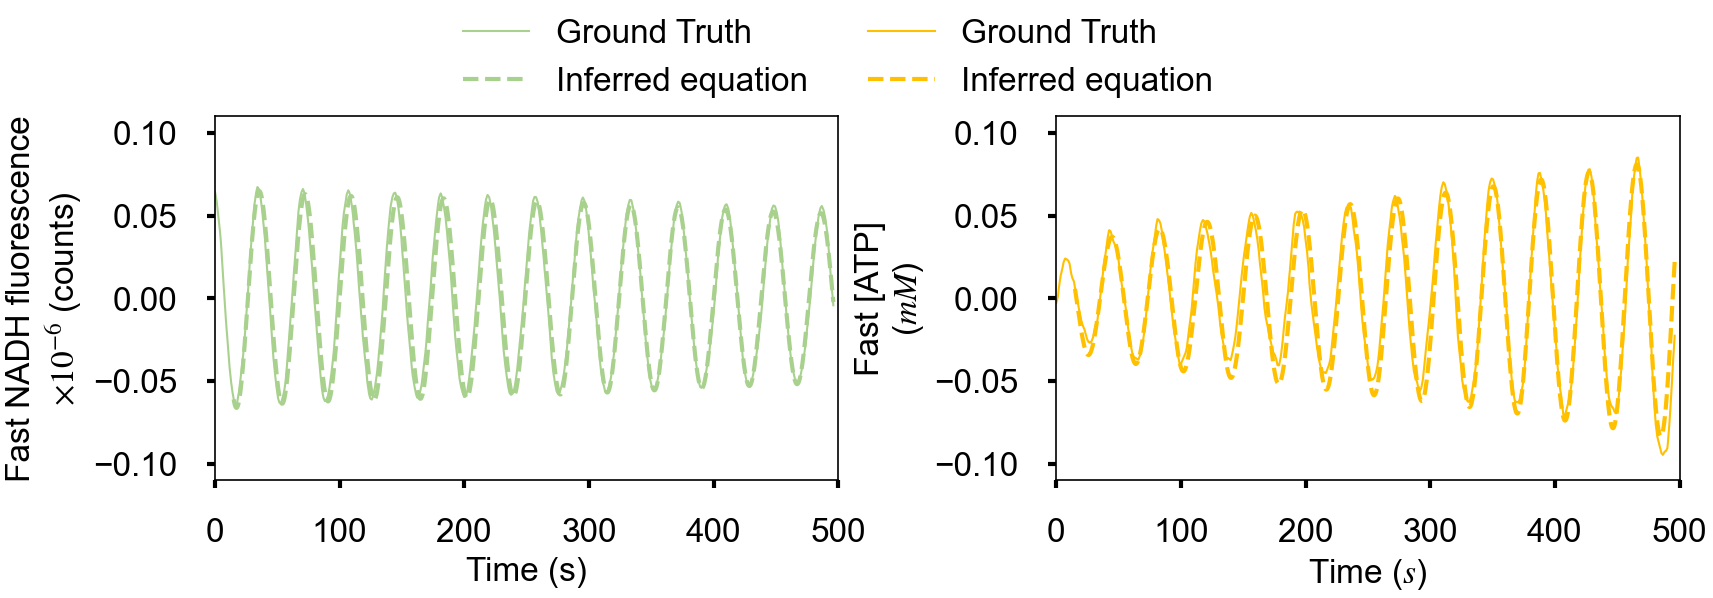

In [43]:
from scipy.integrate import odeint
def YEAST(x,t):
    Phi = np.zeros(len(library))
    for i in range(len(library)):
        Phi[i] = library[i](x)
    x_ddot = -x[0]*model.frequencys[0]**2-np.sum(Phi*model.Xi[0])
    y_ddot = -x[2]*model.frequencys[1]**2-np.sum(Phi*model.Xi[1])
    # x_ddot = -x[0]*model.frequencys[0]**2
    # y_ddot = -x[2]*model.frequencys[1]**2
    return [x[1],x_ddot,x[3],y_ddot]
    # return [x[1],x_ddot]
rebuild = odeint(YEAST,y0 = x0,t=t[start:])
fig,ax = plt.subplots(1,2,figsize = (8/2.54,2/2.54),dpi = 600)
plt.subplots_adjust(wspace = 0.35)
ax[0].tick_params(direction='out',width = 0.5,length = 1)
ax[1].tick_params(direction='out',width = 0.5,length = 1)
ax[0].plot(t, NADH_FAST,lw = 0.25,color = "#A9D18E",label = "Ground Truth")
ax[0].plot(t[start:], rebuild[:,0]*np.max(NADH_FAST)/Scale, lw = 0.5, color = "#A9D18E",ls = '--', label = "Inferred equation")
ax[0].set_xlabel('Time (s)',fontsize = 4)
ax[0].set_ylabel('Fast NADH fluorescence\n'+r'$\times 10^{-6}$ (counts)',fontsize = 4)
ax[0].set_xlim(0,500)
ax[0].set_ylim(-0.11,0.11)
# ax[0].set_xticks([])
ax[0].legend(fontsize = 4, bbox_to_anchor = (1,1.35))
ax[1].plot(t, ATP_FAST,lw = 0.25,color = "#FFC000",label = "Ground Truth")
ax[1].plot(t[start:], rebuild[:,2]*np.max(ATP_FAST)/Scale, lw = 0.5, color = "#FFC000",ls = '--', label = "Inferred equation")
ax[1].set_xlabel('Time ($s$)',fontsize = 4)
ax[1].set_ylabel('Fast [ATP]\n($mM$)',fontsize = 4)
ax[1].set_xlim(0,500)
ax[1].set_ylim(-0.11,0.11)
ax[1].legend(fontsize = 4, bbox_to_anchor = (0.3,1.35))
plt.savefig("Fig/Predict.svg",dpi = 600,transparent = True,bbox_inches="tight")
# plt.plot(t[10:],rebuild[:,0],lw = 1, ls = '--', color = 'red')
# plt.plot(t, X[:,0],lw = 1,color = 'red')
# plt.plot(t[10:],rebuild[:,2],lw = 1, ls = '--', color = 'blue')
# plt.plot(t, X[:,1],lw = 1,color = 'blue')

In [44]:
Scale_basis = [1/np.max(NADH_FAST)*Scale,1/np.max(NADH_FAST)*Scale,1/np.max(ATP_FAST)*Scale,1/np.max(ATP_FAST)*Scale]
model_scales = np.zeros(len(library))
for i in range(len(library)):
    model_scales[i] = library[i](Scale_basis)
for i in range(2):
    print(model.Xi[i]*model_scales/Scale_basis[2*i])

[0.00000000e+00 0.00000000e+00 9.00689979e-01 0.00000000e+00
 0.00000000e+00 6.09011100e+01 1.02427540e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[ 0.00000000e+00  0.00000000e+00 -2.39288990e-01  1.39211424e-02
  0.00000000e+00 -1.78697830e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


Text(0, 0.5, 'Fast [ATP]\n($mM$)')

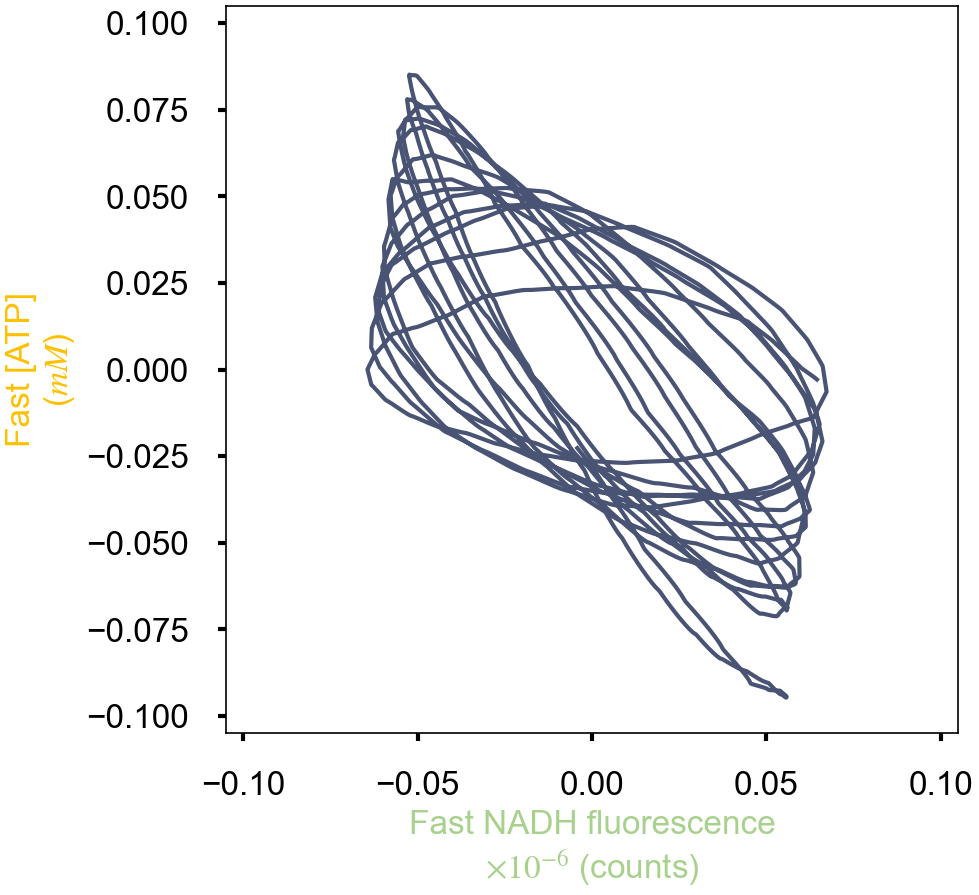

In [45]:
fig,ax = plt.subplots(1,1,figsize = (4/2.54,4/2.54),dpi = 600)
ax.plot(NADH_FAST,ATP_FAST ,lw = 0.5,color = "#495373",label = "Ground Truth")
ax.tick_params(direction='out',width = 0.5,length = 1)
ax.set_xlim(-0.105,0.105)
ax.set_ylim(-0.105,0.105)
ax.set
ax.set_xlabel('Fast NADH fluorescence\n'+r'$\times 10^{-6}$ (counts)',fontsize = 4, color = "#A9D18E")
ax.set_ylabel('Fast [ATP]\n($mM$)',fontsize = 4, color = "#FFC000")

(-0.1, 0.1)

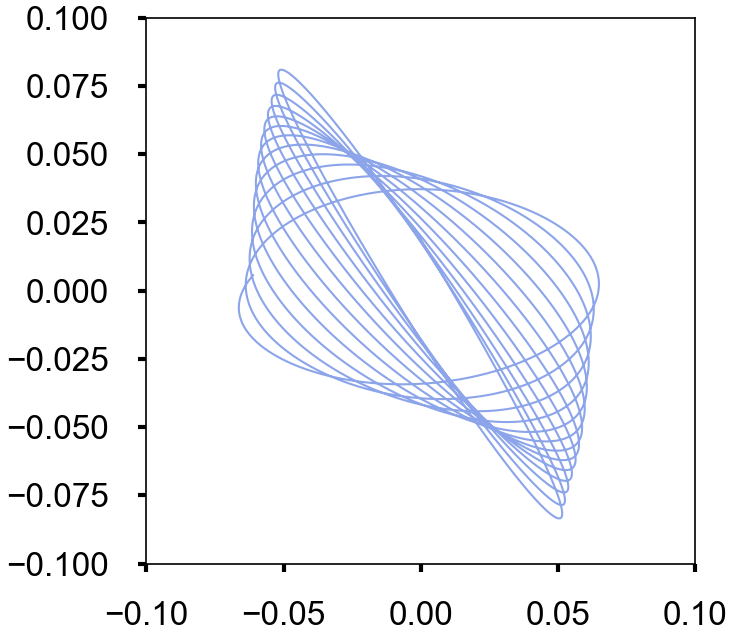

In [46]:
fig,ax = plt.subplots(1,1,figsize = (3/2.54,3/2.54),dpi = 600)
ax.plot(rebuild[:,0]*np.max(NADH_FAST)/Scale,rebuild[:,2]*np.max(ATP_FAST)/Scale ,lw = 0.25,color = "#8CA5EA",label = "Ground Truth")
# ax.plot(NADH_FAST,ATP_FAST ,lw = 0.25,color = "#495373",label = "Ground Truth")
ax.tick_params(direction='out',width = 0.5,length = 1)
ax.set_xlim(-0.1,0.1)
ax.set_ylim(-0.1,0.1)

In [47]:
0.164

0.164